
# UP - 2C 2022 | Data Science | Grupo 3 - Spotify

Trabajo practico realizado por:
- Martin Kraitman
- Ana Gisela Poliak
- Glenda Margarita Schvetz
- Milagros Juarez

In [71]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

import pydotplus
import graphviz
import io
import scipy.misc
import imageio

In [9]:
# Obtengo los dataframes de todas las decadas
ds_00s = pd.read_csv('./Dataset_spotify/Dataset_spotify/dataset-of-00s.csv')
ds_10s = pd.read_csv('./Dataset_spotify/Dataset_spotify/dataset-of-10s.csv')
ds_60s = pd.read_csv('./Dataset_spotify/Dataset_spotify/dataset-of-60s.csv')
ds_70s = pd.read_csv('./Dataset_spotify/Dataset_spotify/dataset-of-70s.csv')
ds_80s = pd.read_csv('./Dataset_spotify/Dataset_spotify/dataset-of-80s.csv')
ds_90s = pd.read_csv('./Dataset_spotify/Dataset_spotify/dataset-of-90s.csv')

# A cada uno le agrego la columna decada en la estructura
ds_60s = ds_60s.assign(decade='60s')
ds_70s = ds_70s.assign(decade='70s')
ds_80s = ds_80s.assign(decade='80s')
ds_90s = ds_90s.assign(decade='90s')
ds_00s = ds_00s.assign(decade='00s')
ds_10s = ds_10s.assign(decade='10s')

# Finalmente para comenzar a analisar todos los datos unimos todo en un solo dataframe
ds = pd.concat([ds_60s, ds_70s, ds_80s, ds_90s, ds_00s, ds_10s])

In [10]:
# Visualizar que datos tenemos
ds.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0,60s


## Descripcion de las columnas
- **Track**: Es el nombre de la cancion
- **Artist**: Es el artista de la cancion
- **URI**: La url de Spotify
- **Danceability**: Grado de bailable entre 0 y 1
- **Energy**: Grado de energia entre 0 y 1
- **Key**: Claves en octava medidas entre valores que van del 0 al 11. Comenzando en C como 0 y C# como 1 y asi sucesivamente.
- **loudness**: Rango de volumen entre -60 y 0
- **mode**: (0 = Minor, 1 = Major)
- **speechiness**: Grado de palabras en la cancion entre 0 y 1 
- **acousticness**: Que tan ruidoso es entre 0 y 1 
- **instrumentalness**: Este valor representa la cantidad de voces en la canción. Cuanto más cerca está de 1.0, más instrumental es la canción
- **liveness**: Este valor describe la probabilidad de que la canción se haya grabado con una audiencia en vivo. Según la documentación oficial, "un valor superior a 0,8 proporciona una gran probabilidad de que la pista esté activa"
- **valence**: Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con una valencia alta suenan más positivas (p. ej., felices, alegres, eufóricas), mientras que las pistas con una valencia baja suenan más negativas (p. ej., tristes, deprimidas, enojadas)
- **tempo**:
- **duration_ms**: Duracion de la cancion en milisegundos
- **time_signature**:
- **chorus_hit**:
- **sections**:
- **target**:
- **decade**: Decada (de donde proviene el dataset [60s, 70s, 80s, 90s, 00s, 10s])

In [11]:
#Verificar tipos de datos
ds.info()

#Informacion general
ds.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 0 to 6397
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float64

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [12]:
# Visualizo la cantidad total de filas por columnas
ds.shape
# Existen 20 columnas por 41106 juntando todas las decadas en un solo dataset

(41106, 20)

In [13]:
#Verificar duplicados // No los hay
ds.duplicated().sum()

0

In [14]:
#No hay valores en null de ninguna columna
ds.isnull().sum() 

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
decade              0
dtype: int64

<AxesSubplot:xlabel='decade', ylabel='count'>

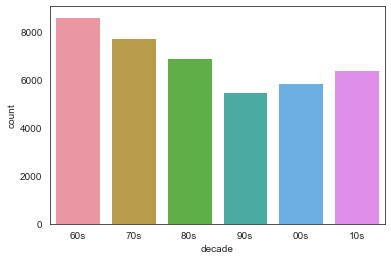

In [15]:
# Visualizo las cantidades por decada
sns.countplot(x='decade', data=ds)

<AxesSubplot:xlabel='decade', ylabel='count'>

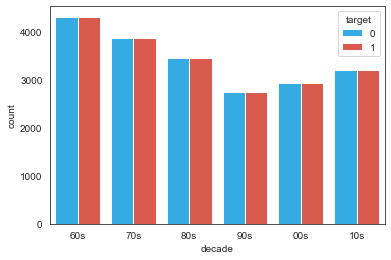

In [16]:
# Visualizo como estan compuestas estas cantidades (estan ordenadas en un 50% 50%)
sns.countplot(x='decade', hue='target', data=ds)

<AxesSubplot:>

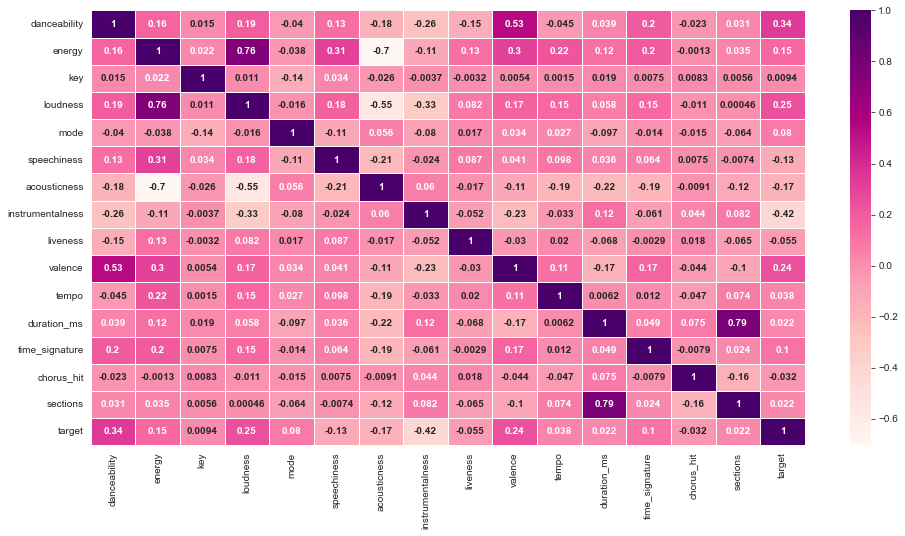

In [17]:
#Visualizacion de la correlacion entre atributos
corr = ds.corr()
fig1 = plot.figure(figsize=(16, 8))
sns.heatmap(ds.corr(method="spearman"), annot=True, annot_kws={'weight':'bold'},linewidths=.5, cmap='RdPu')

Correlaciones encontradas (mayores al 0.50 o menores a -0.50):
- Directamente proporcionales:
    - Sections <-> Durations_ms (0.79)
    - Loudness <-> Energy (0.76)
    - Valance <-> Danceability (0.53)
    
- Inversamente proporcionales:
    - Acusticness <-> Energy (-0.7)
    - Acusticness <-> Loudness (-0.55)

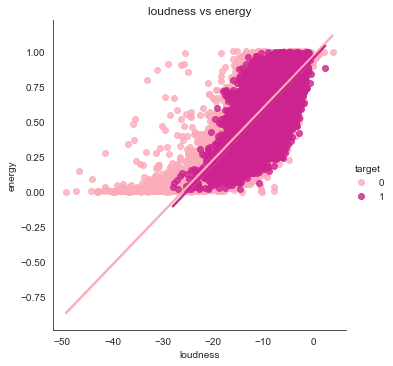

In [18]:
sns.lmplot(x='loudness',y='energy',data=ds, hue='target',palette='RdPu').set(title='loudness vs energy')

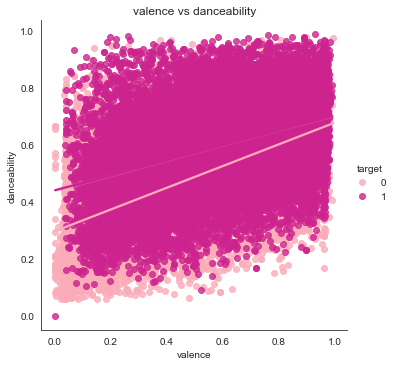

In [19]:
sns.lmplot(x='valence',y='danceability',data=ds, hue='target',palette='RdPu').set(title='valence vs danceability')

In [20]:
# Custom Color Palette
red_blue = ["#19B5FE", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

In [23]:
pos_tempo = ds[ds['target'] == 1]['tempo']
neg_tempo = ds[ds['target'] == 0]['tempo']
pos_dance = ds[ds['target'] == 1]['danceability']
neg_dance = ds[ds['target'] == 0]['danceability']
pos_duration = ds[ds['target'] == 1]['duration_ms']
neg_duration = ds[ds['target'] == 0]['duration_ms']
pos_loudness = ds[ds['target'] == 1]['loudness']
neg_loudness = ds[ds['target'] == 0]['loudness']
pos_speechiness = ds[ds['target'] == 1]['speechiness']
neg_speechiness = ds[ds['target'] == 0]['speechiness']
pos_valence = ds[ds['target'] == 1]['valence']
neg_valence = ds[ds['target'] == 0]['valence']
pos_energy = ds[ds['target'] == 1]['energy']
neg_energy = ds[ds['target'] == 0]['energy']
pos_acousticness = ds[ds['target'] == 1]['acousticness']
neg_acousticness = ds[ds['target'] == 0]['acousticness']
pos_key = ds[ds['target'] == 1]['key']
neg_key = ds[ds['target'] == 0]['key']
pos_instrumentalness = ds[ds['target'] == 1]['instrumentalness']
neg_instrumentalness = ds[ds['target'] == 0]['instrumentalness']

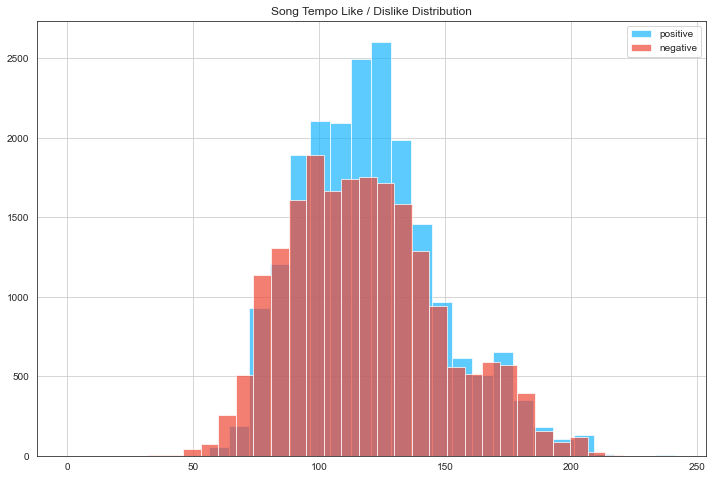

In [27]:
fig = plot.figure(figsize=(12,8))
plot.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha = 0.7, bins = 30, label= 'positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label= 'negative')
plot.legend(loc = 'upper right')

<AxesSubplot:>

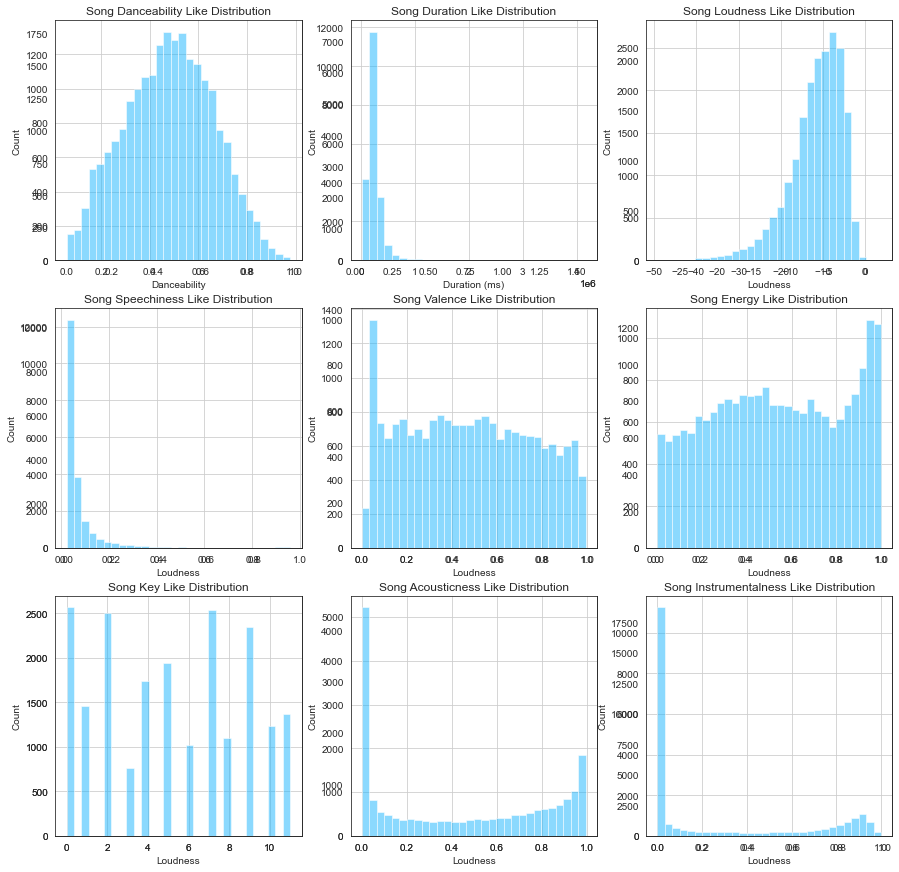

In [31]:
fig2 = plot.figure(figsize=(15,15))

#Danceability

ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist(alpha= 0.5, bins= 30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha= 0.5, bins= 30)

#Duration

ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')
pos_duration.hist(alpha= 0.5, bins= 30)
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha= 0.5, bins= 30)

#Loudness

ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title('Song Loudness Like Distribution')
pos_loudness.hist(alpha= 0.5, bins= 30)
ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha= 0.5, bins= 30)

#Speechiness

ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Loudness')
ax9.set_ylabel('Count')
ax9.set_title('Song Speechiness Like Distribution')
pos_speechiness.hist(alpha= 0.5, bins= 30)
ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha= 0.5, bins= 30)

#Valence

ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Loudness')
ax11.set_ylabel('Count')
ax11.set_title('Song Valence Like Distribution')
pos_valence.hist(alpha= 0.5, bins= 30)
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha= 0.5, bins= 30)

#Energy

ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Loudness')
ax13.set_ylabel('Count')
ax13.set_title('Song Energy Like Distribution')
pos_energy.hist(alpha= 0.5, bins= 30)
ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha= 0.5, bins= 30)

#Key

ax15 = fig2.add_subplot(337)
ax15.set_xlabel('Loudness')
ax15.set_ylabel('Count')
ax15.set_title('Song Key Like Distribution')
pos_key.hist(alpha= 0.5, bins= 30)
ax16 = fig2.add_subplot(337)
neg_key.hist(alpha= 0.5, bins= 30)

#Acousticness

ax17 = fig2.add_subplot(338)
ax17.set_xlabel('Loudness')
ax17.set_ylabel('Count')
ax17.set_title('Song Acousticness Like Distribution')
pos_acousticness.hist(alpha= 0.5, bins= 30)
ax18 = fig2.add_subplot(338)
neg_acousticness.hist(alpha= 0.5, bins= 30)


#Instrumentalness

ax19 = fig2.add_subplot(339)
ax19.set_xlabel('Loudness')
ax19.set_ylabel('Count')
ax19.set_title('Song Instrumentalness Like Distribution')
pos_instrumentalness.hist(alpha= 0.5, bins= 30)
ax20 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha= 0.5, bins= 30)

In [32]:
c = DecisionTreeClassifier(min_samples_split=100)

In [33]:
features = ["danceability", "duration_ms", "loudness", "speechiness", "valence", "energy", "key", "acousticness", "instrumentalness"]

In [36]:
train, test = train_test_split(ds, test_size = 0.15)

#training set
x_train = train[features] 
y_train = train["target"]

#test set
x_test = test[features] 
y_test = test["target"]

In [37]:
print("Training size: {}; Test size: {}".format(len(train), len(test)))

Training size: 34940; Test size: 6166


In [38]:
x_train

,danceability,duration_ms,loudness,speechiness,valence,energy,key,acousticness,instrumentalness
606,0.572,219707,-6.430,0.1110,0.2540,0.9850,9,0.01310,0.000010
3752,0.668,149867,-16.374,0.3690,0.5640,0.0423,2,0.80500,0.000000
3710,0.376,430000,-9.184,0.0305,0.1110,0.3730,7,0.82700,0.832000
610,0.790,337093,-11.840,0.1050,0.6700,0.7270,6,0.00418,0.000162
2874,0.561,141200,-10.109,0.0291,0.6230,0.4520,8,0.85800,0.000000
...,...,...,...,...,...,...,...,...,...
1393,0.820,253920,-9.796,0.0348,0.7400,0.4520,1,0.54300,0.002940
5910,0.276,262427,-9.628,0.0389,0.3110,0.5170,11,0.03760,0.000014
598,0.520,374067,-5.997,0.0467,0.4880,0.8450,4,0.27400,0.000850
6758,0.138,302747,-11.893,0.0353,0.0334,0.3900,5,0.54100,0.025400


In [39]:
y_train

606     1
3752    0
3710    1
610     1
2874    0
       ..
1393    1
5910    1
598     0
6758    0
6206    0
Name: target, Length: 34940, dtype: int64

In [40]:
#training the decision tree classifier
dt = c.fit(x_train,y_train)

In [77]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plot.rcParams["figure.figsize"] = (20,20)
    plot.imshow(img)

In [ ]:
show_tree(dt, features, 'dec_tree.png')